<a href="https://colab.research.google.com/github/vaishnaviid/nndl/blob/main/nndlexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [1]:
from google.colab import files


uploaded = files.upload()


Saving car.csv to car.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['car.csv']))
print(df)

    Mileage  Age(yrs)  Sell Price($)  Unnamed: 3
0         0     69000              6       18000
1         1     35000              3       34000
2         2     57000              5       26100
3         3     22500              2       40000
4         4     46000              4       31500
5         5     59000              5       26750
6         6     52000              5       32000
7         7     72000              6       19300
8         8     91000              8       12000
9         9     67000              6       22000
10       10     83000              7       18700
11       11     79000              7       19500
12       12     59000              5       26000
13       13     58780              4       27500
14       14     82450              7       19400
15       15     25400              3       35000
16       16     28000              2       35500
17       17     69000              5       19700
18       18     87600              8       12800
19       19     5200

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Car Mileage Vs Sell Price ($)

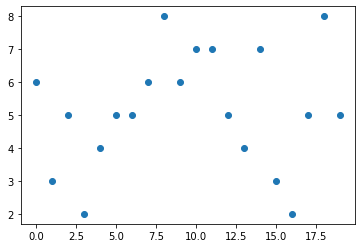

In [ ]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

Car Age Vs Sell Price ($)

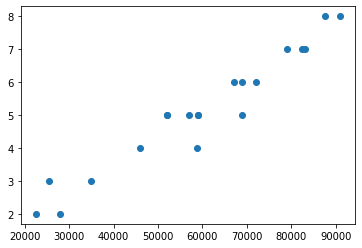

In [ ]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])


looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets

Training: We will train our model on this dataset
Testing: We will use this subset to make actual predictions using trained model
The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [ ]:
X = df[['Mileage','Age(yrs)']]

In [ ]:
y = df['Sell Price($)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [ ]:
X_train

,Mileage,Age(yrs)
1,1,35000
9,9,67000
19,19,52000
8,8,91000
10,10,83000
4,4,46000
0,0,69000
5,5,59000
11,11,79000
12,12,59000


In [ ]:
X_test

,Mileage,Age(yrs)
18,18,87600
14,14,82450
17,17,69000
15,15,25400
7,7,72000
16,16,28000


In [ ]:
y_train

1     3
9     6
19    5
8     8
10    7
4     4
0     6
5     5
11    7
12    5
2     5
13    4
6     5
3     2
Name: Sell Price($), dtype: int64

In [ ]:
y_test

18    8
14    7
17    5
15    3
7     6
16    2
Name: Sell Price($), dtype: int64

Lets run linear regression model now

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,Mileage,Age(yrs)
18,18,87600
14,14,82450
17,17,69000
15,15,25400
7,7,72000
16,16,28000


In [ ]:
clf.predict(X_test)

array([7.54216927, 7.1119478 , 5.94605035, 2.20352763, 6.23546109,
       2.42393439])

In [ ]:
y_test

18    8
14    7
17    5
15    3
7     6
16    2
Name: Sell Price($), dtype: int64

In [ ]:
clf.score(X_test, y_test)

0.9259621215451708

random_state argument

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Mileage,Age(yrs)
7,7,72000
10,10,83000
5,5,59000
6,6,52000
3,3,22500
18,18,87600
